In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [251]:
import os 
os.get_cwd()

AttributeError: module 'os' has no attribute 'get_cwd'

In [39]:
df1 = pd.read_csv(r'C:\Users\Admin\Downloads\dateset\Salaries.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8448\345308807.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r'C:\Users\Admin\Downloads\dateset\Salaries.csv')


### 0. Check null values located in the dataset

<AxesSubplot:>

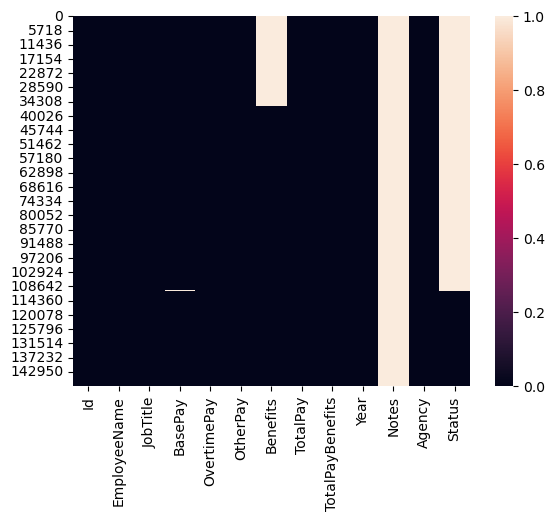

In [177]:
import seaborn as sns
sns.heatmap(df1.isnull())

### 1.Drop ID, Notes, Agency, and Status Columns

In [43]:
df= df1.drop(['Id','Notes','Agency','Status'], axis=1)

### 2.Check infomation of the dataset (number of rows/columns, datatypes of each column, memory requirement)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  object 
 2   BasePay           148049 non-null  object 
 3   OvertimePay       148654 non-null  object 
 4   OtherPay          148654 non-null  object 
 5   Benefits          112495 non-null  object 
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 10.2+ MB


### 3.Replace string values by nan values

In [62]:
df['BasePay'] = df['BasePay'].replace('Not provided', np.nan)
df['OvertimePay'] = df['OvertimePay'].replace('Not Provided', np.nan)
df['OtherPay'] = df['OtherPay'].replace('Not Provided', np.nan)
df['Benefits'] = df['Benefits'].replace('Not Provided', np.nan)

In [182]:
#Check percentage of missing values in each column
df.isnull().sum()*100/len(df)

EmployeeName         0.000000
JobTitle             0.000000
BasePay              0.406996
OvertimePay          0.000000
OtherPay             0.000000
Benefits            24.324924
TotalPay             0.000000
TotalPayBenefits     0.000000
Year                 0.000000
dtype: float64

### 4. Change data type of numerical cols (from objects to numeric type)

In [65]:
df['BasePay'] = pd.to_numeric(df['BasePay'])
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'])
df['OtherPay'] = pd.to_numeric(df['OtherPay'])

### 5.Display Last 4 rows of the dataset

In [69]:
df.tail(4)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148650,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014
148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014
148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014
148653,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014


### 6. Find shape of the dataset (how many rows/columns)

In [72]:
df.shape
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 148654
Number of columns: 9


### 7. Check NULL values in the dataset

In [77]:
df.isnull().sum()

EmployeeName            0
JobTitle                0
BasePay               609
OvertimePay             4
OtherPay                4
Benefits            36163
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

### 8. Get overall Statistics about the Dataframe

In [81]:
df.describe()  #only numerical cols
df.describe(include='all')  #both numerical and categorical cols

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654,148654,148045.000000,148650.000000,148650.000000,112491.0,148654.000000,148654.000000,148654.000000
unique,110811,2159,NaN,NaN,NaN,99634.0,NaN,NaN,NaN
top,Kevin Lee,Transit Operator,NaN,NaN,NaN,0.0,NaN,NaN,NaN
freq,13,7036,NaN,NaN,NaN,1053.0,NaN,NaN,NaN
mean,NaN,NaN,66325.448841,5066.059886,3648.767297,NaN,74768.321972,93692.554811,2012.522643
std,NaN,NaN,42764.635495,11454.380559,8056.601866,NaN,50517.005274,62793.533483,1.117538
min,NaN,NaN,-166.010000,-0.010000,-7058.590000,NaN,-618.130000,-618.130000,2011.000000
25%,NaN,NaN,33588.200000,0.000000,0.000000,NaN,36168.995000,44065.650000,2012.000000
50%,NaN,NaN,65007.450000,0.000000,811.270000,NaN,71426.610000,92404.090000,2013.000000
75%,NaN,NaN,94691.050000,4658.175000,4236.065000,NaN,105839.135000,132876.450000,2014.000000


### 9. Get number of unique Employee Names

In [165]:
df['EmployeeName'].nunique()

110810

### 10. Find occurrence of Employee Names (Top 5) 

In [86]:
df['EmployeeName'].value_counts().head(5)

Kevin Lee       13
Richard Lee     11
Steven Lee      11
William Wong    11
Stanley Lee      9
Name: EmployeeName, dtype: int64

### 11. Number of unique Job Titles containing 'captain'

In [95]:
df['JobTitle'].str.contains('captain', case=False).sum()
len(df[df['JobTitle'].str.contains('captain', case=False)])

552

### 12. Display all the employee Names from Fire department

In [100]:
df[df['JobTitle'].str.contains('fire', case=False)]['EmployeeName']

4            PATRICK GARDNER
6                  ALSON LEE
8             MICHAEL MORRIS
9         JOANNE HAYES-WHITE
10             ARTHUR KENNEY
                 ...        
145956      Kenneth C Farris
147556         Edward A Dunn
148021        Kari A Johnson
148209          Sheryl K Lee
148554       Lawrence F Gatt
Name: EmployeeName, Length: 5879, dtype: object

### 13. Find Minimum, Maximum and Average BasePay

In [102]:
df['BasePay'].describe()

count    148045.000000
mean      66325.448841
std       42764.635495
min        -166.010000
25%       33588.200000
50%       65007.450000
75%       94691.050000
max      319275.010000
Name: BasePay, dtype: float64

### 14. Drop the rows having 4 missing values permanently

In [112]:
df.drop(df[df.isnull().sum(axis=1) ==4].index, axis=0, inplace=True) #cộng theo chiều ngang

### 15. Find the Jobtitle of the person named 'Albert Pardini'

In [130]:
df.loc[df['EmployeeName'].str.lower() == 'albert pardini'][['JobTitle','Year']]

,JobTitle,Year
2,CAPTAIN III (POLICE DEPARTMENT),2011
36519,Captain 3,2012


### 16. How much Albert Pardini make (include benefits)?

In [132]:
df.loc[df['EmployeeName'].str.lower() == 'albert pardini'][['Year','TotalPayBenefits']]

,Year,TotalPayBenefits
2,2011,335279.91
36519,2012,253995.29


### 17. Display name of the person having the highest BasePay

In [140]:
df.loc[df['BasePay']==df['BasePay'].max()][['EmployeeName']]

,EmployeeName
72925,Gregory P Suhr


### 18. Find Average BasePay of all employee per year

In [145]:
df.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

### 19. Find Average BasePay of All Employee Per JobTitle 

In [148]:
df.groupby('JobTitle')['BasePay'].mean()

JobTitle
ACCOUNT CLERK                                     42593.966897
ACCOUNTANT                                        46643.172000
ACCOUNTANT I                                      61777.832500
ACCOUNTANT II                                     66880.084425
ACCOUNTANT III                                    78940.945000
                                                      ...     
WORKER'S COMPENSATION SUPERVISOR I                90966.140000
X-RAY LABORATORY AIDE                             46412.085794
YOUTH COMM ADVISOR                                39077.957500
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910000
ZOO CURATOR                                       43148.000000
Name: BasePay, Length: 1636, dtype: float64

### 20. Find Average BasePay of Employee Having Job Title ACCOUNTANT 

In [159]:
df.loc[df['JobTitle'] == 'ACCOUNTANT'].groupby('JobTitle')['BasePay'].mean()

JobTitle
ACCOUNTANT    46643.172
Name: BasePay, dtype: float64

### 21. Find Top 5 most common jobs

In [164]:
df.groupby('JobTitle')['JobTitle'].count().sort_values(ascending=False).head(5)

JobTitle
TRANSIT OPERATOR    9424
SPECIAL NURSE       5791
REGISTERED NURSE    4955
CUSTODIAN           3214
FIREFIGHTER         3153
Name: JobTitle, dtype: int64

### 22. Check how many employee not giving their names

In [172]:
df.isin(['Not Provided'])['EmployeeName'].sum()

2

### 23. Show distribution chart of BasePay

In [ ]:
# plt.figure(figsize=(5,3))
plt.hist(df['BasePay'])
plt.title('Distribution of Employee BasePay 2011-2014', size=10)
plt.ylabel('Number of employees', size=7)
plt.xlabel('BasePay',size=7)
plt.show()

In [250]:
# 24.Show distribution chart of JobTitles in 2014

In [244]:
# create a table only containing 2014 data with counting unique jobtitle
df14 = df[df['Year'] == 2014].groupby(['JobTitle'])['JobTitle'].count().head(6).reset_index(name='counting')

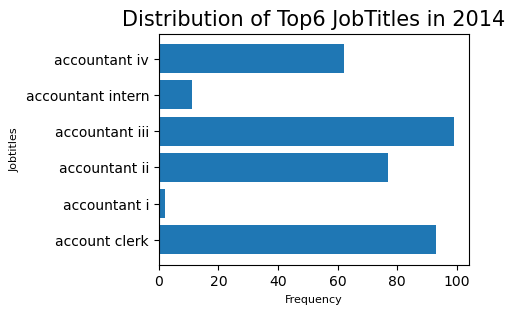

In [249]:
plt.figure(figsize=(4,3)) 

x = df14['JobTitle'].str.lower()
y = df14['counting']
plt.barh(x,y)

plt.title('Distribution of Top6 JobTitles in 2014', size=15)
plt.xlabel('Frequency', size=8)
plt.ylabel('Jobtitles', size=8)
plt.show()